# Exercise 1

In [ ]:
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
mnist = fetch_openml("mnist_784", as_frame=False)
X, y = mnist.data, mnist.target
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


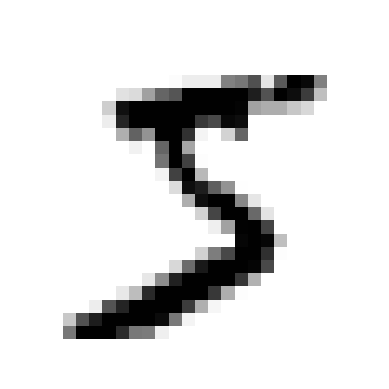

In [3]:
plt.imshow(X[0].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

KeyboardInterrupt: 

In [ ]:
params_grid = {"weights": ["uniform", "distance"], "n_neighbors": [3, 5, 10, 20, 50]}

grid_search = GridSearchCV(
    knn_clf,
    param_grid=params_grid)